In [39]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from uwtrajectory import unified_traj_data as utd
from uwtrajectory.ERA5.add_to_trajectory import add_ERA_to_trajectory
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
sample_trajectory_file = 'sample_trajectory' #happens to be in this directory
ds = utd.xarray_from_tdumpfile(sample_trajectory_file)
ds

<xarray.Dataset>
Dimensions:  (time: 49)
Coordinates:
  * time     (time) datetime64[ns] 2015-07-15T16:00:00 ... 2015-07-17T16:00:00
Data variables:
    fhour    (time) int64 2 1 0 1 2 3 2 1 0 1 2 3 2 ... 1 0 1 2 3 2 1 0 1 2 3 2
    lat      (time) float64 48.86 49.15 49.43 49.69 ... 41.64 41.06 40.47 39.86
    lon      (time) float64 -150.7 -149.7 -148.7 -147.7 ... -129.7 -130.0 -130.3
    height   (time) float64 896.8 896.7 903.3 904.7 ... 999.7 1.005e+03 1e+03
    pres     (time) float64 911.5 911.2 910.3 910.7 ... 909.0 908.4 906.9 907.8
Attributes:
    Title:              CSET Unified Trajectory Product
    institution:        Department of Atmospheric Sciences, University of Was...
    contact:            jkcm@uw.edu
    Creation Time:      2021-10-22 01:22:36.906634
    trajectory_setup:   Trajectories were run isobarically from an initializa...
    HYSPLIT_params:     Trajectories run using HYSPLIT (Hybrid Single Particl...
    HYSPLIT_reference:  Stein, A.F., Draxler, R.R, Rol

### Note that the above is just a quick way to get a trajectory file for a demo. all ds has to contain for the rest of the code to work is a "time" dimension and two variables: lat and lon.

There are two ways to add ERA data; from within the unified_traj_data method (useful if adding other datasets as well), or separately using add_ERA_to_trajectory (more straightforward)

In [41]:
#just using add_ERA_to_trajectory:
ds = add_ERA_to_trajectory(ds, box_degrees=2)

prepping data...
creating gradient in MR...
done
working on cc...
100.00%      ETA 18:22:44      time left: 0 seconds        
working on z...
100.00%      ETA 18:22:45      time left: 0 seconds        
working on o3...
100.00%      ETA 18:22:45      time left: 0 seconds        
working on r...
100.00%      ETA 18:22:46      time left: 0 seconds        
working on clwc...
100.00%      ETA 18:22:46      time left: 0 seconds        
working on crwc...
100.00%      ETA 18:22:46      time left: 0 seconds        
working on t...
100.00%      ETA 18:22:47      time left: 0 seconds        
working on u...
100.00%      ETA 18:22:47      time left: 0 seconds        
working on v...
100.00%      ETA 18:22:48      time left: 0 seconds        
working on w...
100.00%      ETA 18:22:48      time left: 0 seconds        
working on q...
100.00%      ETA 18:22:48      time left: 0 seconds         
working on MR...
100.00%      ETA 18:22:49      time left: 0 seconds        
working on dtdx...
100.00%   

In [42]:
# #doing it using unified_traj_data, also including ERA_sfc; this could also be done as after add_ERA_to_trajectory (just import and call add_ERA_sfc_to_trajectory as well),
# all_datasets = utd.all_datasets
# print(all_datasets)
# datasets_to_include = ['ERA', 'ERA_sfc'] #just doing these for now
# ds = utd.make_trajectory(ds, skip=[i for i in all_datasets if not i in datasets_to_include])

In [43]:
ds

<xarray.Dataset>
Dimensions:    (level: 37, time: 49)
Coordinates:
  * time       (time) datetime64[ns] 2015-07-15T16:00:00 ... 2015-07-17T16:00:00
  * level      (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Data variables:
    fhour      (time) int64 2 1 0 1 2 3 2 1 0 1 2 3 ... 1 0 1 2 3 2 1 0 1 2 3 2
    lat        (time) float64 48.86 49.15 49.43 49.69 ... 41.06 40.47 39.86
    lon        (time) float64 -150.7 -149.7 -148.7 ... -129.7 -130.0 -130.3
    height     (time) float64 896.8 896.7 903.3 904.7 ... 999.7 1.005e+03 1e+03
    pres       (time) float64 911.5 911.2 910.3 910.7 ... 908.4 906.9 907.8
    ERA_cc     (time, level) float64 0.0 0.0 0.0 0.0 ... 0.05015 0.03235 0.0
    ERA_z      (time, level) float64 4.802e+05 4.27e+05 ... 3.959e+03 1.846e+03
    ERA_o3     (time, level) float64 4.243e-06 6.07e-06 ... 6.752e-08 6.972e-08
    ERA_r      (time, level) float64 0.0005493 0.0005493 ... 91.84 89.13
    ERA_clwc   (time, level) float64 0.0 0.0 0.0 0.0 ... 3.

AttributeError: module 'matplotlib.pyplot' has no attribute 'yaxis'

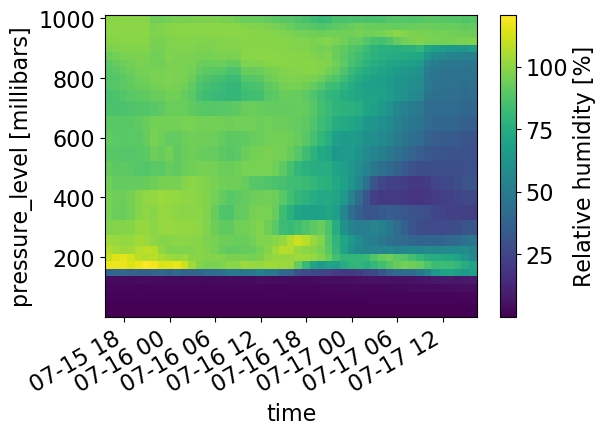

In [44]:
ds.ERA_r.plot(x='time')
plt.yaxis.invert()